Ajusta por mínimos cuadrados dos modelos de la forma:

Realiza una gráfica que involucre los datos y los dos modelos. Calcula el ECM de ambos modelos y responde ¿cuál es el modelo con menor ECM?

$$
1)    log(y) = log(b) + alog(x)
$$$$
2)    log(y) = log(b) + alog(x) + c(log(x))^2
$$

In [3]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt 
import pprint
np.set_printoptions(precision = 2)

In [5]:
datos=np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)

Text(0.5, 1.0, 'datos')

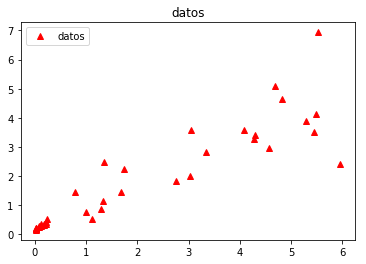

In [6]:
x = datos[:,0]
y = datos[:,1]
plt.plot(x, y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')

## Modelo 1

1)    log(y) = log(b) + alog(x)

In [7]:
#Modelo1
modelo_1=lambda var: np.log(var)
z=np.log(y)
mpoints,=x.shape
A=np.ones((mpoints,2))
A[:,1]=modelo_1(x)
Q,R=np.linalg.qr(A)
betas=np.linalg.solve(R,Q.T@z)
print('betas')
pprint.pprint(betas)

betas
array([0.26, 0.58])


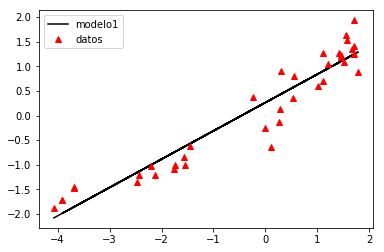

In [8]:
y_gorro1_QR= betas[0] + betas[1]*modelo_1(x)
plt.plot(np.log(x),y_gorro1_QR,'k-',np.log(x) ,np.log(y),'r^')
plt.legend(['modelo1','datos'], loc='best')

## Modelo 2

2)    log(y) = log(b) + alog(x) + c(log(x))^2

In [27]:
#Modelo2
phi_1=lambda var: np.log(var)
phi_2=lambda var: (np.log(var))**2
z=np.log(y)
mpoints,=x.shape
A=np.ones((mpoints,3)) 
A[:,1]=phi_1(x)
A[:,2]=phi_2(x)
Q,R=np.linalg.qr(A)
betas_A=np.linalg.solve(R,Q.T@z)
print('betas')
pprint.pprint(betas_A)

betas
array([0.05, 0.7 , 0.07])


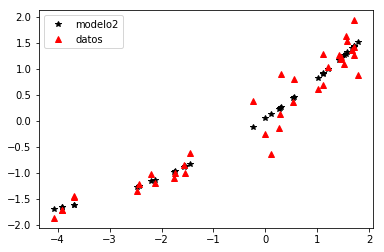

In [42]:
y_gorro2_QR=betas_A[0] + betas_A[1]*phi_1(x)+betas_A[2]*phi_2(x)
plt.plot(np.log(x),y_gorro2_QR,'k*',np.log(x),np.log(y),'r^')
plt.legend(['modelo2','datos'], loc='best')